In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [3]:
# 3
train_image_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_image_generator = ImageDataGenerator(rescale = 1.0 /255)
test_image_generator = ImageDataGenerator(rescale = 1.0 /255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=test_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


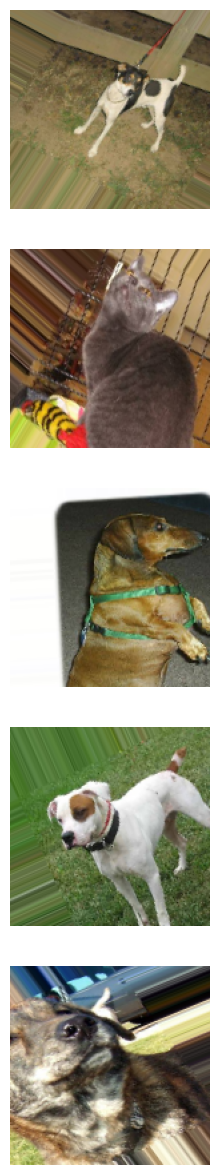

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [5]:
# 5

train_image_generator = ImageDataGenerator(
    rescale=1.0 / 255,          # Normalize pixel values to [0, 1]
    rotation_range=40,          # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,      # Randomly shift images horizontally by 20% of width
    height_shift_range=0.2,     # Randomly shift images vertically by 20% of height
    shear_range=0.2,            # Shear transformations
    zoom_range=0.2,             # Randomly zoom in/out
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill empty pixels after transformation with nearest pixel value
)



Found 2000 images belonging to 2 classes.


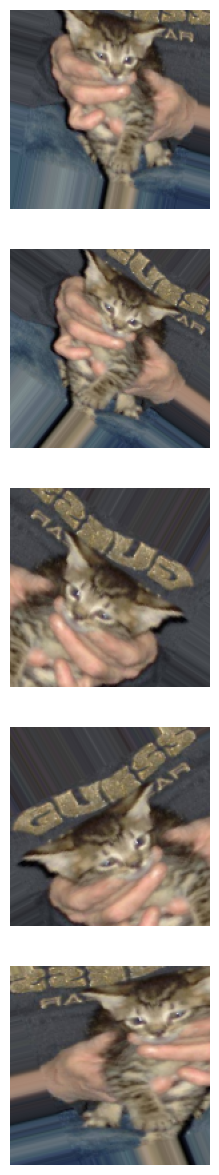

In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [7]:
# Define the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))  # 32 filters, 3x3 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))  # Reduce dimensions by 2x2 pooling

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))  # 64 filters
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))  # 128 filters
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())  # Flatten the 2D outputs to 1D for Dense layers

# Fully Connected Layers
model.add(Dense(512, activation='relu'))  # Dense layer with 512 units
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Train the model
history = model.fit(
    train_data_gen,                # Training data generator
    steps_per_epoch=total_train // batch_size,  # Number of batches per epoch
    epochs=epochs,                 # Number of epochs to train the model
    validation_data=val_data_gen,  # Validation data generator
    validation_steps=total_val // batch_size   # Number of validation batches per epoch
)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 130s 8s/step - accuracy: 0.5024 - loss: 0.8774 - val_accuracy: 0.5502 - val_loss: 0.6893
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:37 7s/step - accuracy: 0.5547 - loss: 0.6919

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.5547 - loss: 0.6919 - val_accuracy: 0.5865 - val_loss: 0.6801
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 124s 7s/step - accuracy: 0.5419 - loss: 0.6882 - val_accuracy: 0.6205 - val_loss: 0.6680
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.6250 - loss: 0.6701 - val_accuracy: 0.5288 - val_loss: 0.6836
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.5488 - loss: 0.6795 - val_accuracy: 0.5379 - val_loss: 0.6859
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.4766 - loss: 0.7448 - val_accuracy: 0.5481 - val_loss: 0.6826
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 133s 7s/step - accuracy: 0.5346 - loss: 0.6888 - val_accuracy: 0.6228 - val_loss: 0.6573
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.6641 - loss: 0.6644 - val_accuracy: 0.6635 - val_loss: 0.6318
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 126s 8s/step - accuracy: 0.5875 - loss: 0.6639 - val_accuracy: 0.6395 - val_loss: 0

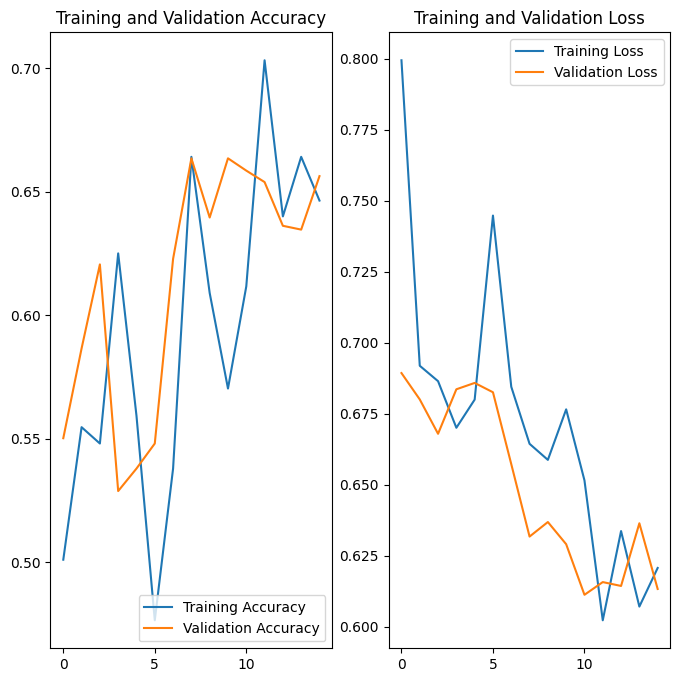

In [9]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
print(f"Contents of the test directory: {os.listdir(test_dir)}")


Contents of the test directory: ['35.jpg', '38.jpg', '50.jpg', '11.jpg', '31.jpg', '13.jpg', '43.jpg', '42.jpg', '26.jpg', '27.jpg', '44.jpg', '41.jpg', '15.jpg', '16.jpg', '39.jpg', '6.jpg', '36.jpg', '23.jpg', '48.jpg', '.DS_Store', '10.jpg', '22.jpg', '5.jpg', '2.jpg', '28.jpg', '1.jpg', '30.jpg', '47.jpg', '33.jpg', '8.jpg', '45.jpg', '37.jpg', '40.jpg', '18.jpg', '46.jpg', '24.jpg', '17.jpg', '19.jpg', '3.jpg', '49.jpg', '4.jpg', '34.jpg', '9.jpg', '20.jpg', '14.jpg', '25.jpg', '29.jpg', '7.jpg', '12.jpg', '32.jpg', '21.jpg']


In [16]:
import shutil

# Create subdirectories for 'cats' and 'dogs' in the test directory
cats_dir = os.path.join(test_dir, 'cats')
dogs_dir = os.path.join(test_dir, 'dogs')

# Create the directories if they don't already exist
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

# Move the images to their respective directories (this is just an example)
# Note: You will need to adjust this step based on your actual image distribution.
for img_name in os.listdir(test_dir):
    if img_name.endswith('.jpg'):
        # Just as an example, let's assume odd-numbered images are cats and even-numbered images are dogs
        if int(img_name.split('.')[0]) % 2 == 0:
            shutil.move(os.path.join(test_dir, img_name), os.path.join(dogs_dir, img_name))
        else:
            shutil.move(os.path.join(test_dir, img_name), os.path.join(cats_dir, img_name))

print(f"Images moved to {cats_dir} and {dogs_dir}")


Images moved to cats_and_dogs/test/cats and cats_and_dogs/test/dogs


In [17]:
test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    shuffle=False  # Important for correct predictions
)


Found 50 images belonging to 2 classes.


In [18]:
# Step 1: Generate predictions for the test dataset
probabilities = model.predict(test_data_gen).flatten()

# Step 2: Align with the `answers` list
probabilities = probabilities[:len(answers)]

# Step 3: Round probabilities for comparison
rounded_predictions = [round(p) for p in probabilities]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step


In [19]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 58.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
